### Algorithm: CNN-LSTM with normalization vo
### Created: April 16, 2025
### Dataset : Hadn Movement Direction
### Author: Edgar Acuna 


In [457]:
import tensorflow


In [458]:
# cnn lstm model
from numpy import mean
from numpy import std, unique
from numpy import dstack
from pandas import read_csv
#from keras.models import Sequential
##from keras.layers import Dense
#from keras.layers import Flatten
#from keras.layers import Dropout
#from keras.layers import LSTM
#from keras.layers import TimeDistributed
#from keras.layers.convolutional import Conv1D
#from keras.layers.convolutional import MaxPooling1D
#from keras.utils import to_categorical
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score, ConfusionMatrixDisplay
import tensorflow.keras.layers as layers
import keras
from numpy import mean
from numpy import std, unique
from numpy import dstack
from pandas import read_csv
#from keras.layers import TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D, LSTM, TimeDistributed
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical

# load a single file as a numpy array
#def load_file(filepath):
#    dataframe = read_csv(filepath, header=None)
#    return dataframe.values

In [459]:
import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing

import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing

def load_data(dataset, split="Train"):
    if split=="Train":
        X, y = load_classification(dataset, split="Train")
    else:
        X, y = load_classification(dataset, split="Test")
    print(" Shape of X = ", X.shape)
    print(" Shape of y = ", y.shape)
    #Swap dimensions so features are the third dimension
    X = X.swapaxes(1, 2)
    print(" New shape of X = ", X.shape)
    #prepare y
    y = pd.DataFrame(y)
    enc = preprocessing.OneHotEncoder(dtype=int)
    enc.fit(y)
    y = enc.transform(y).toarray()
    print(" New shape of y = ", y.shape)
    return X, y


In [460]:
# loading Training data
X, y = load_data("HandMovementDirection",split="Train")
print(y.shape)

 Shape of X =  (160, 10, 400)
 Shape of y =  (160,)
 New shape of X =  (160, 400, 10)
 New shape of y =  (160, 4)
(160, 4)


In [461]:
# loading Testing data
Xt, yt = load_data("HandMovementDirection",split="Test")

 Shape of X =  (74, 10, 400)
 Shape of y =  (74,)
 New shape of X =  (74, 400, 10)
 New shape of y =  (74, 4)


In [462]:
import numpy as np
Xb= np.concatenate((X, Xt),axis=0)
print(Xb.shape)

(234, 400, 10)


In [463]:
from sklearn.preprocessing import StandardScaler#
scaler = StandardScaler()
#tempo=X.reshape(X.shape[2],-1).T
#print(tempo.shape)
#X = scaler.fit_transform(X.reshape(X.shape[2], -1)).reshape(X.shape)
Xb = scaler.fit_transform(Xb.reshape(Xb.shape[2], -1)).reshape(Xb.shape)
#Xt = scaler.fit_transform(Xt.reshape(Xt.shape[2], -1)).reshape(Xt.shape)
#X1 = scaler.fit_transform(tempo)
#print(X)
#tempodf=pd.DataFrame(X1)
#print(tempodf.shape)
#pyplot.boxplot(tempodf)
#pyplot.show()

In [464]:
Xn1=Xb[0:160]
print(Xn1.shape)
Xn2=Xb[160:234]
print(Xn2.shape)

(160, 400, 10)
(74, 400, 10)


In [465]:
# define model
import time
verbose, epochs, batch_size = 1, 300, 32
#trainX, trainy, testX, testy = trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)
trainX=Xn1
trainy=y
testX=Xn2
testy=yt
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
print(n_features)
# reshape data into time steps of sub-sequences
n_steps, n_length =5,80
#For P#n_steps, n_length = 5, 20
print(trainX.shape)
trainX = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features))
print(trainX.shape)
testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))
#print("number of features",n_features)
# define model
model = keras. Sequential()
model.add(keras.Input(shape=(None,n_length,n_features)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
#model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
#model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(Conv1D(filters=512, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
#model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(Conv1D(filters=1024, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
#model.add(Dropout(0.5))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.summary()
start_time=time.time()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
# evaluate model
test_results= model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
#print(test_results)

10
(160, 400, 10)
(160, 5, 80, 10)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_118            │ (None, None, 78, 64)   │         1,984 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_119            │ (None, None, 39, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_120            │ (None, None, 37, 128)  │        24,704 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_121            │ (None, None, 18, 128)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_122            │ (None, None, 16, 512)  │       197,120 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_123            │ (None, None, 8, 512)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_124            │ (None, None, 6, 1024)  │     1,573,888 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_125            │ (None, None, 3, 1024)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_126            │ (None, None, 3072)     │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, None, 64)       │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,691,844 (10.27 MB)

 Trainable params: 2,691,844 (10.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.2049 - loss: 1.3969
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.1963 - loss: 1.3894
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.2743 - loss: 1.3853
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.2700 - loss: 1.3884
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.2253 - loss: 1.3881
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.1815 - loss: 1.3891
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.2552 - loss: 1.3870
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.2743 - loss: 1.3869
Epoch 9/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.2398 - loss: 1.3878
Epoch 10/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.2782 - loss: 1.3862
Epoch 11/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.1832 - loss: 1.3868
Epoch 12/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy:

In [466]:
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')
print("Training time:---  %s seconds ---" % (time.time() - start_time))

Test results - Loss: 6.293194770812988 - Accuracy: 0.3378378450870514%
Training time:---  263.9325213432312 seconds ---


In [467]:
#Computing F1-score
import numpy as np
import sklearn
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
train_features = np.array(trainX)
test_features = np.array(testX)
train_labels=np.array(trainy)
#train_labels=pd.DataFrame(trainy)
#n_values = train_labels.idxmax(axis=1)
y_values=np.argmax(train_labels,axis=1)
#print(y_values)
test_labels=np.array(testy)
yt_values=np.argmax(test_labels,axis=1)
#train_predictions_baseline = model.predict_classes(train_features, batch_size=150)
a=model.predict([test_features])
predict_classes=np.argmax(a,axis=1)
th=.8
atempo=a.max(axis=1)
print(atempo.shape)
print('Rate of Probability of classification exceeding a threshold in test',(atempo[atempo>th].shape[0])/atempo.shape[0])
#prob2=pd.DataFrame(model.predict_proba(test_features,batch_size=150))
#a=prob2.max(axis=1)
#print('Probability of classification',(a[a>.80].shape[0])/prob2.shape[0])
#print('Rate of Probability of classification exceding a trhershold',(a[a>.50].shape[0])/a.shape[0])
a1=model.predict([train_features])
predict_classes1=np.argmax(a1,axis=1)
#f1_train=sklearn.metrics.f1_score(ytrain, train_predictions_baseline, average="weighted")
#test_predictions_baseline = model.predict_classes(test_features, batch_size=150)
#print(test_predictions_baseline)
#f1_test=sklearn.metrics.f1_score(test_labels, test_predictions_baseline, average="weighted")
#print('f1_scores in testing set',f1_test)
#Calculating metrics for each class
print("EVALUATION ON TESTING DATA")
print(classification_report(yt_values, predict_classes))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_1580
Received: inputs=('Tensor(shape=(32, 5, 80, 10))',)



1/3 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step

C:\Users\User\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_1580
Received: inputs=('Tensor(shape=(None, 5, 80, 10))',)



3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 483ms/step
(74,)
Rate of Probability of classification exceeding a threshold in test 0.8918918918918919
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.71      0.17      0.27        30
           2       0.39      0.47      0.42        15
           3       0.27      0.93      0.41        14

    accuracy                           0.34        74
   macro avg       0.34      0.39      0.28        74
weighted avg       0.42      0.34      0.27        74



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [468]:
cm=confusion_matrix(yt_values, predict_classes)
#print(cm)
good=np.diag(cm)/np.unique(yt_values,return_counts=True)[1]
#print(good)

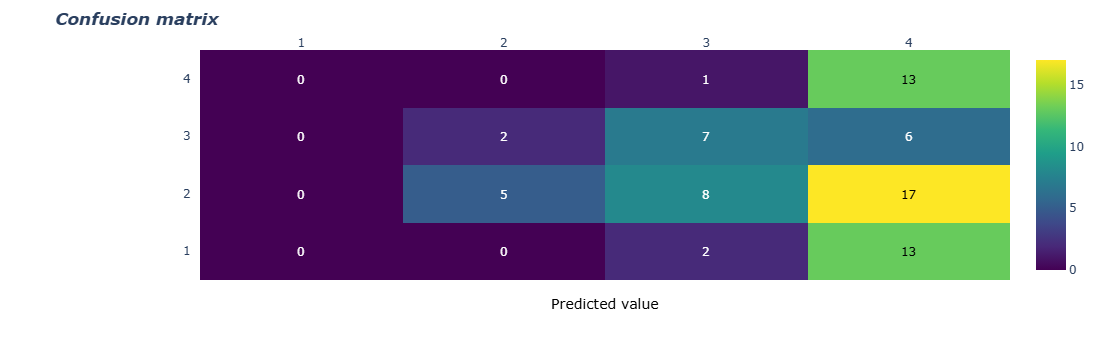

In [469]:
import plotly.figure_factory as ff
# invert z idx values

z= cm

# invert z idx values
#z = z[::-1]

#abnormal, normal
x= [1,2,3,4]
y1=x
#y =x[::-1].copy() # invert idx values of x
#print(y)
#y=x
# change each element of z to type string for annotations
z_text = [[str(y1) for y1 in x] for x in z]

# set up figure
fig = ff.create_annotated_heatmap(z, x=x, y=y1, annotation_text=z_text, colorscale='Viridis')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Actual value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()

In [470]:
# evaluate model
Xt = Xt.reshape((Xt.shape[0], n_steps, n_length, n_features))
test_results1= model.evaluate(Xt, yt, batch_size=batch_size, verbose=0)
print(f'Test results1 - Loss: {test_results1[0]} - Accuracy: {test_results1[1]}%')
#print(test_results)

Test results1 - Loss: 5.815090656280518 - Accuracy: 0.3918918967247009%
